In [155]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector

In [156]:
def getSlope(line: cv2.HoughLinesP) -> float:
    x1, y1, x2, y2 = line[0]
    return (y2 - y1) / (x2 - x1) 

In [157]:
def getLen(line: cv2.HoughLinesP) -> float:
    x1, y1, x2, y2 = line[0]
    return np.sqrt(np.power(x2 - x1, 2) + np.power(y2 - y1, 2))

In [158]:
# def filterLines(lines: list) -> list:
#     slopes = {}
#     lens = {}
#     for i in len(lines[:-1]):
#         slopes[i] = getSlope(lines[i])
#         lens[i] = getLen(lines[i])
    
#     new_lines = {}
#     return new_lines

In [159]:
img = cv2.imread('rov_pool.jpg')

In [160]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 20, 100, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1, # 1
                np.pi/180, # np.pi/180
                100, # 100
                minLineLength=100, # 100
                maxLineGap=30, # 10
        ) # detect lines

In [161]:
for line in lines:
    slope = getSlope(line)
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    print(f'{slope = }')
    cv2.putText(img, f'{slope = }', (x1, y1), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 0), 2)

slope = 1.7383177570093458
slope = 0.40307692307692305
slope = 0.36302895322939865
slope = 1.7360594795539033
slope = 3.2672413793103448
slope = 3.2758620689655173
slope = 0.3626666666666667
slope = 0.4236453201970443


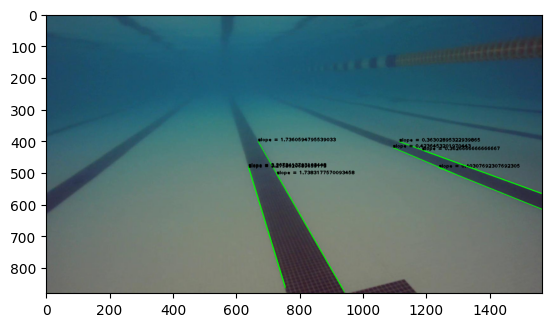

In [162]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [163]:
# img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)

In [164]:
# at_detector = Detector(families='tag36h11',
#                        nthreads=1, # 1
#                        quad_decimate=1.0, # 1.0
#                        quad_sigma=0.0, # 0.0
#                        refine_edges=1, # 1
#                        decode_sharpening=0.25, # 0.25
#                        debug=0) # 0

In [165]:
# tags = at_detector.detect(img, 
#                           estimate_tag_pose=False, 
#                           camera_params=None, 
#                           tag_size=None)

In [166]:
# color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

In [167]:
# for tag in tags:

#     for idx in range(len(tag.corners)):
#         cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), 
#                  tuple(tag.corners[idx, :].astype(int)), 
#                  (0, 255, 0))

#     cv2.putText(color_img, str(tag.tag_id),
#                 org=(tag.corners[0, 0].astype(int) + 10, 
#                      tag.corners[0, 1].astype(int) + 10),
#                 fontFace=cv2.FONT_HERSHEY_SIMPLEX,
#                 fontScale=0.8,
#                 color=(0, 0, 255))

In [168]:
# plt.imshow(color_img)